In [1]:
%matplotlib inline
import ee
import auxil.lookup as lookup
import matplotlib.pyplot as plt
from auxil.ee_enlml import enl
import numpy as np
ee.Initialize()
image = ee.Image('users/mortcanty/enltest')

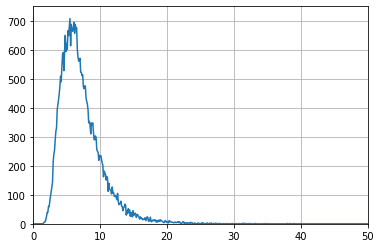

In [2]:
hist = np.array(enl(image).getInfo())
x = np.linspace(0,80,800)
plt.plot(x,hist)
plt.ylim([0,750])
plt.xlim([0,50])
plt.grid()
plt.show()

In [6]:
ls imagery/radarsat2bonn

rs2bonn_bmap.tif  T20090525.tif  T20090829.tif  T20100707.tif
rs2bonn_cmap.tif  T20090618.tif  T20091016.tif  T20100731.tif
rs2bonn_fmap.tif  T20090712.tif  T20100426.tif  T20100824.tif
rs2bonn_smap.tif  T20090805.tif  T20100520.tif  T20101011.tif


In [9]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GDT_Float32,GA_ReadOnly

inDataset = gdal.Open('imagery/radarsat2bonn/T20100426.tif',GA_ReadOnly)
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    


m = 12
simimage = np.zeros((cols*rows,9))
for i in range(cols*rows):
    if i % 50000 == 0:
        print (i,end=' ')
    X = np.mat(np.random.randn(m,3))
    Y = np.mat(np.random.randn(m,3))
    Wr = X.T*X + Y.T*Y
    Wi = X.T*Y - Y.T*X
    W = (Wr - 1j*Wi)/2
    simimage[i,0] = np.real(W[0,0])
    simimage[i,1] = np.real(W[0,1])
    simimage[i,2] = np.imag(W[0,1])
    simimage[i,3] = np.real(W[0,2])
    simimage[i,4] = np.imag(W[0,2])
    simimage[i,5] = np.real(W[1,1])
    simimage[i,6] = np.real(W[1,2])
    simimage[i,7] = np.imag(W[1,2])
    simimage[i,8] = np.real(W[2,2])
          
driver = gdal.GetDriverByName('GTiff')    
outDataset = driver.Create('imagery/enlsim.tif',cols,rows,9,GDT_Float32) 
projection = inDataset.GetProjection()
geotransform = inDataset.GetGeoTransform()
if geotransform is not None:
    outDataset.SetGeoTransform(geotransform)
if projection is not None:
    outDataset.SetProjection(projection)
for i in range(9):
    outBand = outDataset.GetRasterBand(i+1)
    outBand.WriteArray(np.reshape(simimage[:,i],(rows,cols)),0,0) 
    outBand.FlushCache()  
outDataset = None    
print('Done')

0 50000 100000 150000 200000 250000 300000 350000 400000 450000 500000 550000 600000 650000 700000 750000 800000 850000 900000 950000 Done


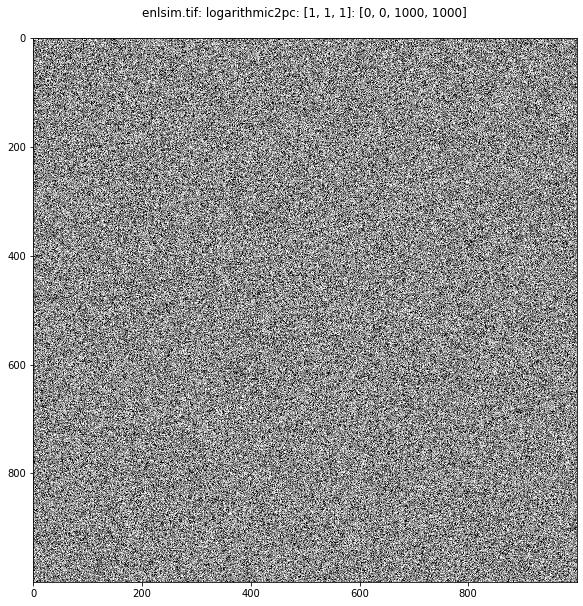

In [10]:
run scripts/dispms -f imagery/enlsim.tif